In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D


In [ ]:
cifr10 = tf.keras.datasets.cifar10

In [ ]:
(train_images,train_labels),(test_images,test_labels) = cifr10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

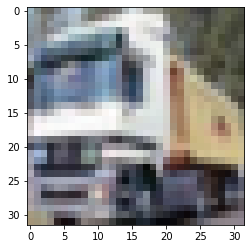

In [ ]:
plt.imshow(train_images[1])

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
test_images.shape

(10000, 32, 32, 3)

In [ ]:
#train_images = np.array([xobject[:,:,0] for xobject in train_images])

In [ ]:
#test_images = np.array([xobject[:,:,0] for xobject in test_images])

In [ ]:
#train_images = train_images.reshape(50000,32,32,1)
#test_images = test_images.reshape(10000,32,32,1)

In [ ]:
train_images = train_images.astype(float)
test_images = test_images.astype(float)

In [ ]:
train_images = train_images/255.0

In [ ]:
test_images = test_images/255.0

In [ ]:
cnn = tf.keras.Sequential()
cnn.add(Conv2D(filters=128,kernel_size=(3,3),kernel_initializer='he_uniform',activation='relu',input_shape=(32,32,3)))
cnn.add(tf.keras.layers.Dropout(rate=0.3))
cnn.add(MaxPooling2D(pool_size=(3,3)))
cnn.add(Conv2D(filters=128,kernel_size=(3,3),kernel_initializer='he_uniform',activation='relu'))
cnn.add(tf.keras.layers.Dropout(rate=0.3))
cnn.add(MaxPooling2D(pool_size=(3,3)))
cnn.add(tf.keras.layers.Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

In [ ]:
cnn.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
cnn.fit(train_images,train_labels,epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8172 - accuracy: 0.3337
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2660 - accuracy: 0.5513
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1229 - accuracy: 0.6078
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0415 - accuracy: 0.6384
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9782 - accuracy: 0.6637
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9297 - accuracy: 0.6762
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9019 - accuracy: 0.6875
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8688 - accuracy: 0.6999
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8405 - accuracy: 0.7093
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.824

In [ ]:
cnn.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.9492 - accuracy: 0.6983


[0.9492048621177673, 0.6983000040054321]

In [ ]:
pip install -q -U keras-tuner

     |████████████████████████████████| 71kB 4.0MB/s 


In [ ]:
import kerastuner as kt

In [ ]:
from kerastuner.tuners import RandomSearch

HyperParameters

1) How many number of hidden layers we should have ?
2) How many number of neurons we should have in hidden layers ?
3) Learning rate

In [ ]:
def model_builder(hp):
  model = tf.keras.Sequential()
  model.add(Conv2D(filters=128,kernel_size=(3,3),kernel_initializer='he_uniform',activation='relu',input_shape=(32,32,3)))
  model.add(MaxPooling2D(pool_size=(3,3)))


  model.add(Conv2D(filters=hp.Int('conv_1_filter',min_value=32,max_value=128,step=16),kernel_size=(3,3),kernel_initializer='he_uniform',activation='relu'))
  model.add(MaxPooling2D(pool_size=(3,3)))
    
  model.add(tf.keras.layers.Flatten())

  for i in range(hp.Int('num_layers',1,5)):
    model.add(Dense(units=hp.Int('units_'+str(i),min_value=32,max_value=128,step=32),kernel_initializer='he_uniform',activation='relu'))
  
  model.add(Dense(10,activation='softmax'))

  model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

  return model

In [ ]:
tuner1 = RandomSearch(model_builder,  objective='val_accuracy',
                     max_trials=5)

tuner1.search(train_images,train_labels,validation_data=(test_images,test_labels),epochs=10,batch_size=32)

Trial 5 Complete [00h 02m 16s]
val_accuracy: 0.6837999820709229

Best val_accuracy So Far: 0.6837999820709229
Total elapsed time: 00h 11m 02s
INFO:tensorflow:Oracle triggered exit


In [ ]:
(tuner1.get_best_models()[0]).evaluate(test_images,test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.9558 - accuracy: 0.6811


[0.9565979242324829, 0.6837999820709229]

Hyper Parameter tuning 


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense , Dropout, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization
from keras.activations import relu, sigmoid

In [ ]:
def create_model(layers,activation,dropoutRatio):
  model = tf.keras.Sequential()
  model.add(Conv2D(filters=128,kernel_size=(3,3),kernel_initializer='he_uniform',activation='relu'))
  model.add(Dropout(rate=dropoutRatio))
  model.add(MaxPooling2D(pool_size=(3,3)))
  model.add(Conv2D(filters=128,kernel_size=(3,3),kernel_initializer='he_uniform',activation='relu'))
  model.add(Dropout(rate=dropoutRatio))
  model.add(MaxPooling2D(pool_size=(3,3)))

  model.add(tf.keras.layers.Flatten())

  for i, nodes in enumerate(layers):
    if i == 0:
      model.add(Dense(nodes,input_shape=(32,32,3)))
      model.add(Activation(activation))
      model.add(Dropout(rate = dropoutRatio))
    else:
      model.add(Dense(nodes))
      model.add(Activation(activation))
      model.add(Dropout(rate = dropoutRatio))
  
  model.add(Dense(10,kernel_initializer='he_uniform',activation='softmax'))
  
  model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
  return model



In [ ]:
model = KerasClassifier(build_fn=create_model,verbose=0)

In [ ]:
layers = [[32],[32,64],[32,64,128]] # 1 hidden layer with 32 neurons, 2 hidden layers with 32 and 64 neurons
activation = ['sigmoid','relu']
dropoutRatio = [0.1,0.2,0.3,0.4,0.5]

In [ ]:
param = dict(layers=layers,activation=activation,dropoutRatio=dropoutRatio,batch_size=[32],epochs=[10])

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(estimator=model,param_grid=param,cv=5)

In [ ]:
grid_result = grid.fit(train_images,train_labels)

RuntimeError: ignored

In [ ]:
grid_result

NameError: ignored

Transfer learning

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
import cv2

In [ ]:
classifier = VGG16(include_top=False,weights='imagenet')

In [ ]:
for layers in classifier.layers:
  layers.trainable = False

In [ ]:
model1 = tf.keras.layers.Flatten()(classifier.output)
model2 = tf.keras.layers.Dense(10,activation='softmax')(model1)

ValueError: ignored

In [ ]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(10,activation='softmax'))(classifier)

TypeError: ignored

In [ ]:
from pyimagesearch.preprocessing import ImageToArrayPreprocessor

ModuleNotFoundError: ignored